In [18]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from sklearn.preprocessing import StandardScaler
import csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import tqdm

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Load in and save the 2016 Data
prop_df = pd.read_csv('/content/drive/MyDrive/properties_2016.csv')
log_error_df = pd.read_csv('/content/drive/MyDrive/train_2016_v2.csv')
data_2016 = pd.merge(log_error_df, prop_df, on='parcelid', how = 'left')

# Load in and save the 2016 Data
prop_df_2017 = pd.read_csv('/content/drive/MyDrive/properties_2017.csv')
error_df_2017 = pd.read_csv('/content/drive/MyDrive/train_2017.csv')
data_2017 = pd.merge(error_df_2017, prop_df_2017, on='parcelid', how = 'left')




<ipython-input-20-b4dceedd6e86>:2: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  prop_df = pd.read_csv('/content/drive/MyDrive/properties_2016.csv')
<ipython-input-20-b4dceedd6e86>:7: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  prop_df_2017 = pd.read_csv('/content/drive/MyDrive/properties_2017.csv')


In [21]:

means = data_2016.mean()
means2 = data_2017.mean()
# Replace NaN values with the mean of their respective columns
data_2016 = data_2016.fillna(means)
data_2017 = data_2017.fillna(means)


<ipython-input-21-2c2028f70333>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = data_2016.mean()
<ipython-input-21-2c2028f70333>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means2 = data_2017.mean()


# Distribution of Home Tax Value


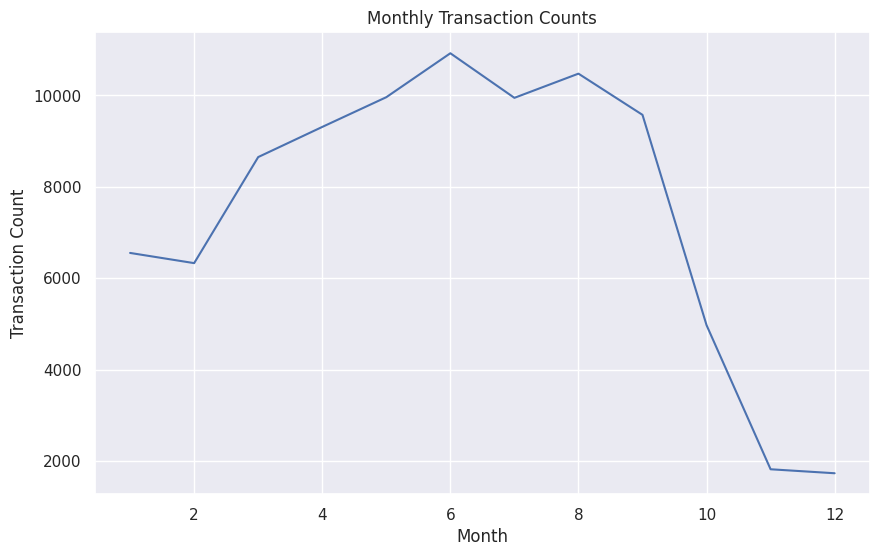

In [22]:
#Lets do some analysis
data_2016['transactiondate'] = pd.to_datetime(data_2016['transactiondate'])
data_2016['transaction_month'] = data_2016['transactiondate'].dt.month
monthly_transaction_counts = data_2016['transaction_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_transaction_counts.index, y=monthly_transaction_counts.values)
plt.title('Monthly Transaction Counts')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()



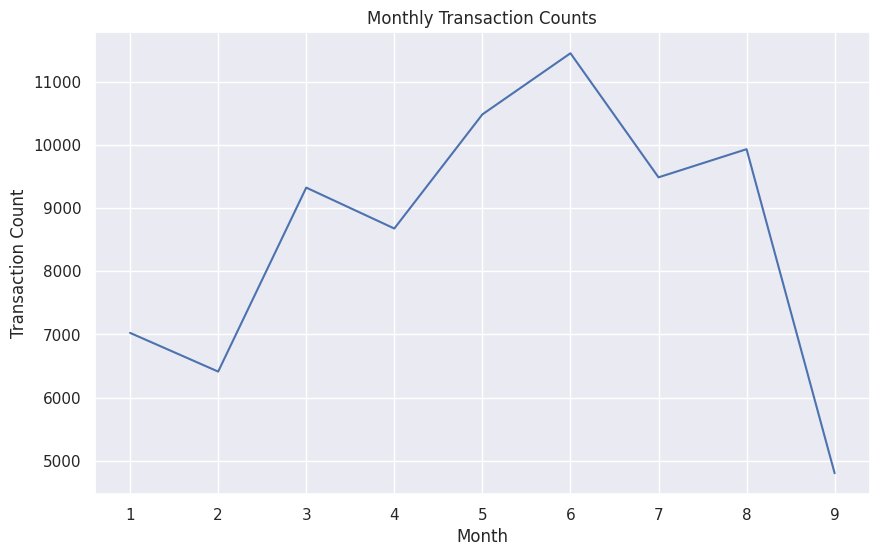

In [23]:
#Lets do some analysis
data_2017['transactiondate'] = pd.to_datetime(data_2017['transactiondate'])
data_2017['transaction_month'] = data_2017['transactiondate'].dt.month
monthly_transaction_counts = data_2017['transaction_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_transaction_counts.index, y=monthly_transaction_counts.values)
plt.title('Monthly Transaction Counts')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()


#### It seems the greatest number of transactions or home sales happen betwen the months of March to September. During the Spring/ Summer and early Fall season.


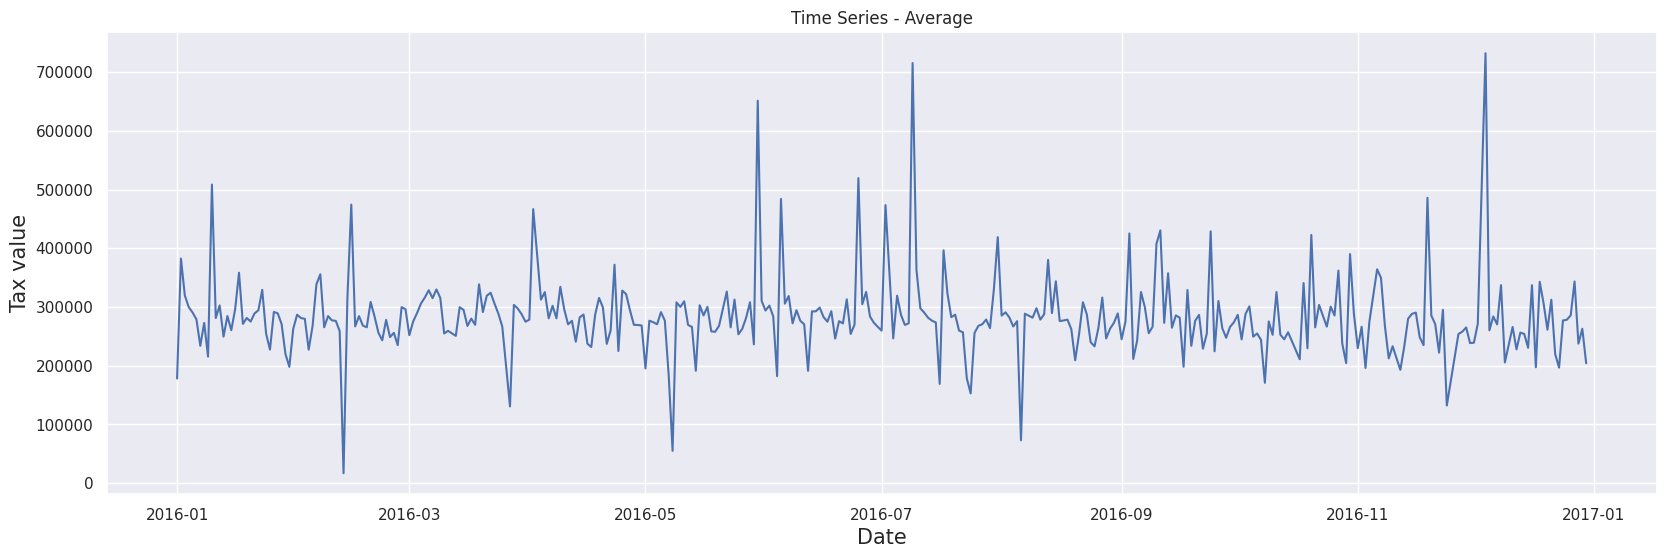

In [24]:

plt.figure(figsize=(20, 6))
mean_group = data_2016[['transactiondate','landtaxvaluedollarcnt']].groupby(['transactiondate'])['landtaxvaluedollarcnt'].mean()
plt.plot(mean_group)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Tax value', fontsize=15)
plt.title('Time Series - Average')
plt.show()


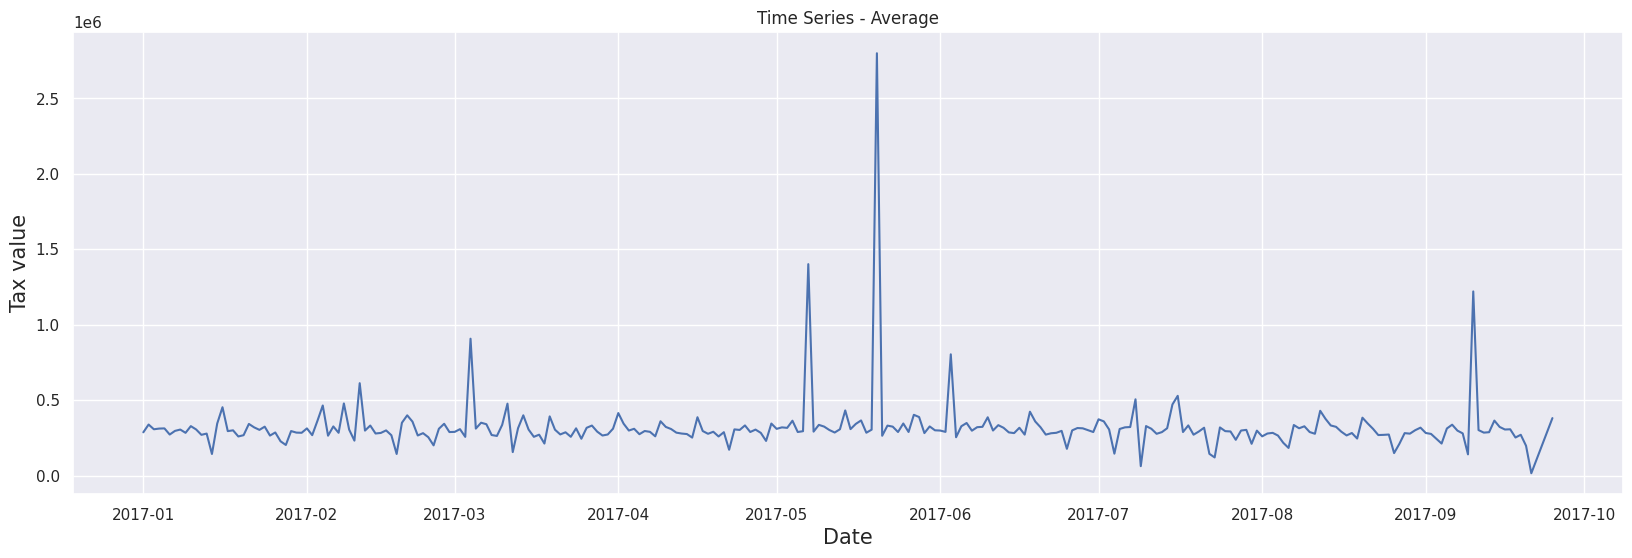

In [25]:
plt.figure(figsize=(20, 6))
mean_group = data_2017[['transactiondate','landtaxvaluedollarcnt']].groupby(['transactiondate'])['landtaxvaluedollarcnt'].mean()
plt.plot(mean_group)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Tax value', fontsize=15)
plt.title('Time Series - Average')
plt.show()


#### The average tac value of homes seem to spike during the summer

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


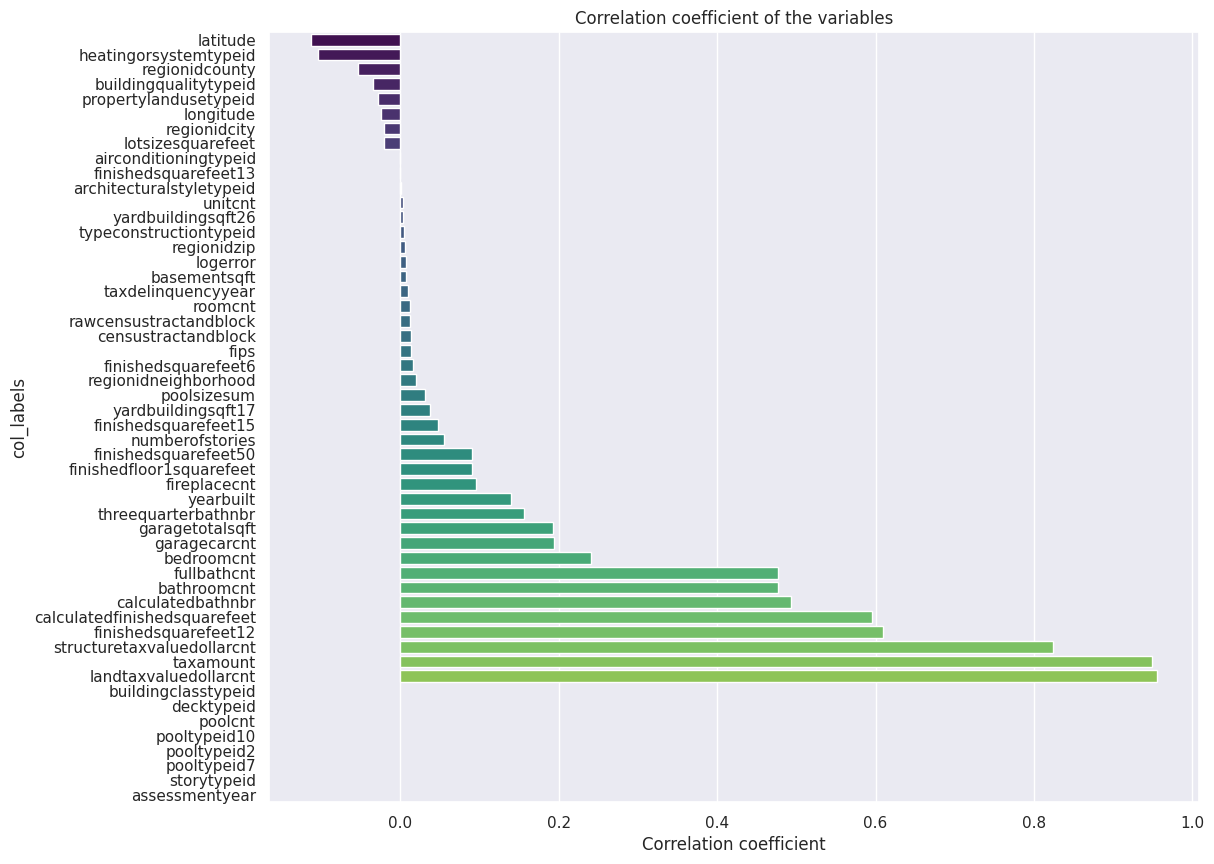

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate mean values and fill missing values


# Select columns of type 'float64'
x_cols = [col for col in data_2016.columns if col != 'taxvaluedollarcnt' and data_2016[col].dtype == 'float64']

labels = []
values = []

for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(data_2016[col].values, data_2016['taxvaluedollarcnt'].values)[0, 1])

corr_df = pd.DataFrame({'col_labels': labels, 'corr_values': values})
corr_df = corr_df.sort_values(by='corr_values')

# Create a horizontal bar plot with Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x='corr_values', y='col_labels', data=corr_df, palette='viridis')

plt.xlabel("Correlation coefficient")
plt.title("Correlation coefficient of the variables")

plt.show()


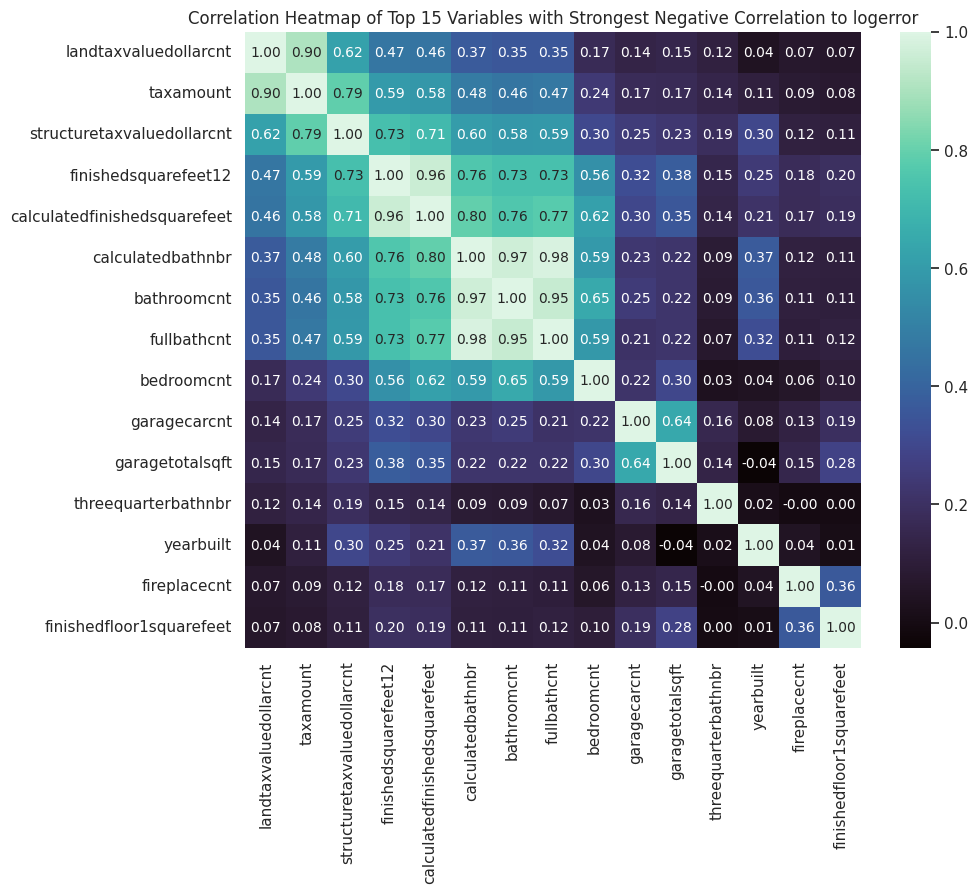

In [27]:
k = 15 # Number of variables for the heatmap
cols = corr_df.nlargest(k, 'corr_values')['col_labels']
cm = np.corrcoef(data_2016[cols].values.T)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='mako')
plt.title(f'Correlation Heatmap of Top {k} Variables with Strongest Negative Correlation to logerror')
plt.show()


<ipython-input-28-9206d6e04ff1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_2016.corr()[['taxvaluedollarcnt']].sort_values(by='taxvaluedollarcnt', ascending=False).drop('taxvaluedollarcnt').head(15), annot=True, cmap='viridis')


<Axes: >

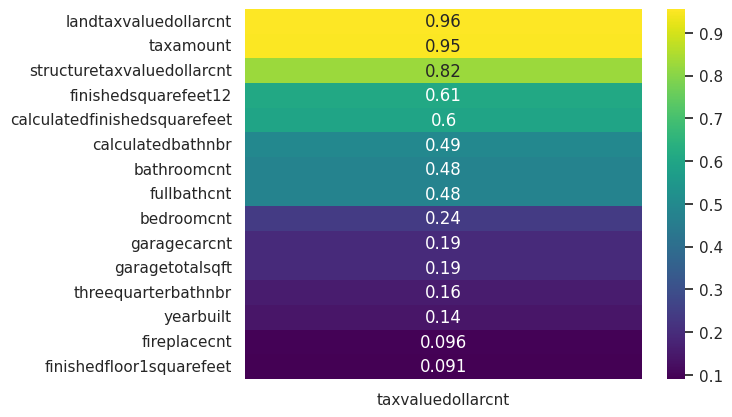

In [28]:
sns.heatmap(data_2016.corr()[['taxvaluedollarcnt']].sort_values(by='taxvaluedollarcnt', ascending=False).drop('taxvaluedollarcnt').head(15), annot=True, cmap='viridis')

<ipython-input-29-a96925292317>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_2017.corr()[['taxvaluedollarcnt']].sort_values(by='taxvaluedollarcnt', ascending=False).drop('taxvaluedollarcnt').head(15), annot=True, cmap='viridis')


<Axes: >

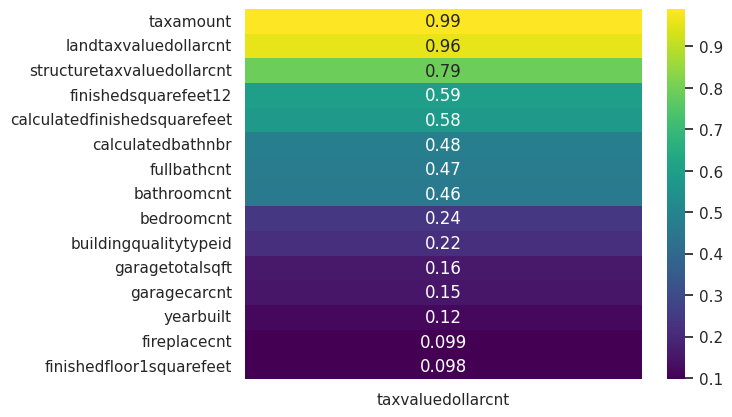

In [29]:
sns.heatmap(data_2017.corr()[['taxvaluedollarcnt']].sort_values(by='taxvaluedollarcnt', ascending=False).drop('taxvaluedollarcnt').head(15), annot=True, cmap='viridis')


In [30]:
key_features = list(data_2016[cols].columns)
key_features.remove('landtaxvaluedollarcnt')
print(f'The Key Featyres we will focus on are {key_features}')

The Key Featyres we will focus on are ['taxamount', 'structuretaxvaluedollarcnt', 'finishedsquarefeet12', 'calculatedfinishedsquarefeet', 'calculatedbathnbr', 'bathroomcnt', 'fullbathcnt', 'bedroomcnt', 'garagecarcnt', 'garagetotalsqft', 'threequarterbathnbr', 'yearbuilt', 'fireplacecnt', 'finishedfloor1squarefeet']


# Train Test Split


In [31]:
data_2016[5:]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transaction_month
5,11509835,-0.2705,2016-01-02,1.000000,7.229885,713.581395,4.0,4.0,4.0,1.000000,...,1.0,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,13.402692,6.037621e+13,1
6,12286022,0.0440,2016-01-02,1.816372,7.229885,713.581395,1.0,2.0,4.0,7.000000,...,1.0,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,13.402692,6.037542e+13,1
7,17177301,0.1638,2016-01-02,1.816372,7.229885,713.581395,2.5,3.0,4.0,5.565407,...,1.0,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,13.402692,6.111003e+13,1
8,14739064,-0.0030,2016-01-02,1.816372,7.229885,713.581395,1.0,2.0,4.0,5.565407,...,1.0,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,13.402692,6.059042e+13,1
9,14677559,0.0843,2016-01-03,1.816372,7.229885,713.581395,2.0,2.0,4.0,5.565407,...,1.0,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,13.402692,6.059063e+13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,2016-12-30,1.000000,7.229885,713.581395,1.0,1.0,4.0,4.000000,...,1.0,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,13.402692,6.037132e+13,12
90271,12046695,0.0070,2016-12-30,1.816372,7.229885,713.581395,3.0,3.0,4.0,4.000000,...,1.0,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,13.402692,6.037301e+13,12
90272,12995401,-0.2679,2016-12-30,1.816372,7.229885,713.581395,2.0,4.0,4.0,7.000000,...,1.0,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.000000,6.037433e+13,12
90273,11402105,0.0602,2016-12-30,1.816372,7.229885,713.581395,2.0,2.0,4.0,4.000000,...,1.0,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,13.402692,6.037601e+13,12


In [32]:
data_2017[5:]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transaction_month
5,17143294,-0.020526,2017-01-01,1.816372,7.229885,713.581395,2.0,3.0,4.0,5.565407,...,1.0,198640.0,331064.0,2016.0,132424.0,3508.10,NaN,13.402692,6.111005e+13,1
6,12095076,-0.001011,2017-01-01,1.000000,7.229885,713.581395,3.0,4.0,4.0,9.000000,...,1.0,276684.0,773303.0,2016.0,496619.0,9516.26,NaN,13.402692,6.037461e+13,1
7,12069064,0.101723,2017-01-01,1.816372,7.229885,713.581395,1.0,2.0,4.0,5.000000,...,1.0,18890.0,218552.0,2016.0,199662.0,2366.08,NaN,13.402692,6.037302e+13,1
8,12790562,-0.040966,2017-01-02,1.816372,7.229885,713.581395,3.0,4.0,4.0,9.000000,...,1.0,177527.0,220583.0,2016.0,43056.0,3104.19,NaN,13.402692,6.037500e+13,1
9,11542646,-0.036763,2017-01-02,1.816372,7.229885,713.581395,3.0,2.0,4.0,8.000000,...,1.0,151303.0,371361.0,2016.0,220058.0,4557.32,NaN,13.402692,6.037275e+13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,10833991,-0.002245,2017-09-20,1.000000,7.229885,713.581395,3.0,3.0,4.0,8.000000,...,1.0,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,13.402692,6.037132e+13,9
77609,11000655,0.020615,2017-09-20,1.816372,7.229885,713.581395,2.0,2.0,4.0,6.000000,...,1.0,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,13.402692,6.037101e+13,9
77610,17239384,0.013209,2017-09-21,1.816372,7.229885,713.581395,2.0,4.0,4.0,5.565407,...,1.0,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,13.402692,6.111008e+13,9
77611,12773139,0.037129,2017-09-21,1.000000,7.229885,713.581395,1.0,3.0,4.0,4.000000,...,1.0,32797.0,49546.0,2016.0,16749.0,876.43,NaN,13.402692,6.037434e+13,9


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Filter data for August to July periods in 2016
aug_jul_2016 = data_2016[(data_2016['transaction_month'] >= 4) & (data_2016['transaction_month'] <= 7)]

# Extract the selected features and the target variable 'taxvaluedollarcnt' for training
X_train = aug_jul_2016[key_features]
y_train = aug_jul_2016['taxvaluedollarcnt']

# Split the training data into training and validation sets (e.g., 80% training, 20% validation)

# Filter data for August to July periods in 2017 for validation
aug_jul_2017 = data_2017[(data_2017['transaction_month'] >= 4) & (data_2017['transaction_month'] <= 7)]
# Extract features and target variable 'taxvaluedollarcnt' for validation on 2017 data
X_val = aug_jul_2017[key_features]
y_val = aug_jul_2017['taxvaluedollarcnt']


In [34]:
(aug_jul_2016)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transaction_month
497,13850164,-0.0460,2016-06-29,13.000000,7.229885,713.581395,2.0,3.0,4.0,5.565407,...,1.0,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,13.402692,6.059001e+13,6
814,11005771,0.0545,2016-06-17,1.816372,7.229885,713.581395,2.0,5.0,4.0,4.000000,...,1.0,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,13.402692,6.037101e+13,6
1165,11554091,-0.0954,2016-07-05,1.816372,7.229885,713.581395,2.0,3.0,4.0,4.000000,...,1.0,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,13.402692,6.037272e+13,7
1265,12689560,0.0402,2016-06-27,1.816372,7.229885,713.581395,2.0,3.0,4.0,4.000000,...,1.0,59745.0,128673.0,2015.0,68928.0,2731.41,NaN,13.402692,6.037670e+13,6
1382,14683772,-0.0070,2016-05-19,1.816372,7.229885,713.581395,1.0,1.0,4.0,5.565407,...,1.0,66020.0,139620.0,2015.0,73600.0,1760.70,NaN,13.402692,6.059032e+13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61760,17296293,-0.9339,2016-07-31,1.816372,7.229885,713.581395,3.5,2.0,4.0,5.565407,...,1.0,222019.0,661106.0,2015.0,439087.0,10721.30,NaN,13.402692,6.111007e+13,7
61761,14740273,-0.0263,2016-07-31,1.816372,7.229885,713.581395,2.5,2.0,4.0,5.565407,...,1.0,133129.0,319693.0,2015.0,186564.0,3255.46,NaN,13.402692,6.059063e+13,7
61762,17105889,0.0149,2016-07-31,1.816372,7.229885,713.581395,2.5,4.0,4.0,5.565407,...,1.0,320074.0,533454.0,2015.0,213380.0,5826.94,NaN,13.402692,6.111005e+13,7
61763,11657877,-0.0182,2016-07-31,1.816372,7.229885,713.581395,1.0,1.0,4.0,4.000000,...,1.0,124000.0,449000.0,2015.0,325000.0,5688.60,NaN,13.402692,6.037264e+13,7


In [35]:
(aug_jul_2017)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transaction_month
117,11393337,0.086137,2017-06-08,1.816372,7.229885,713.581395,3.0,3.0,4.0,4.000000,...,1.0,20684.0,43439.0,2016.0,22755.0,756.94,Y,14.000000,6.037235e+13,6
1018,11721753,0.017785,2017-07-21,1.816372,7.229885,713.581395,2.0,3.0,4.0,6.000000,...,1.0,41948.0,205123.0,2016.0,163175.0,2627.48,NaN,13.402692,6.037220e+13,7
1248,11289917,-0.362001,2017-06-23,1.000000,7.229885,713.581395,2.0,3.0,4.0,6.000000,...,1.0,108890.0,136104.0,2016.0,27214.0,2319.90,Y,15.000000,6.037901e+13,6
1734,11637029,-0.093399,2017-07-28,1.000000,7.229885,713.581395,2.0,3.0,4.0,9.000000,...,1.0,256538.0,810694.0,2016.0,554156.0,9407.01,Y,13.000000,6.037701e+13,7
1772,11705026,-0.146056,2017-06-30,1.816372,7.229885,713.581395,1.0,2.0,4.0,6.000000,...,1.0,11982.0,35606.0,2016.0,23624.0,543.69,NaN,13.402692,6.037232e+13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62966,12495113,0.043190,2017-07-31,1.816372,7.229885,713.581395,1.0,2.0,4.0,4.000000,...,1.0,82249.0,411253.0,2016.0,329004.0,4930.87,NaN,13.402692,6.037574e+13,7
62967,17265599,0.017669,2017-07-31,1.816372,7.229885,713.581395,2.0,3.0,4.0,5.565407,...,1.0,127000.0,363000.0,2016.0,236000.0,3806.60,NaN,13.402692,6.111006e+13,7
62968,14345617,0.013834,2017-07-31,1.816372,7.229885,713.581395,2.5,3.0,4.0,5.565407,...,1.0,127270.0,677171.0,2016.0,549901.0,7059.28,NaN,13.402692,6.059053e+13,7
62969,12495087,0.055213,2017-07-31,1.816372,7.229885,713.581395,2.0,3.0,4.0,6.000000,...,1.0,215600.0,677000.0,2016.0,461400.0,8802.85,Y,15.000000,6.037574e+13,7


# LINEAR REGRESSION

In [36]:
print('------------Linear Regression-----------------')
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

# Model prediction on the training set
y_train_pred = lm.predict(X_train)
print("========================================================================")
# Model Evaluation on the training set
print('------------Train Set-----------------')
print('R^2:', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_train_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
rmse_train_linreg = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_train_linreg =  (rmse_train_linreg/np.mean(y_train))
print('RMSE: {:.2f}'.format(rmse_train_linreg))
print("========================================================================")

# # Predicting Test data with the model
# y_test_pred = lm.predict(X_test)

# # Model Evaluation on the test set
# print('------------Test Set-----------------')
# acc_linreg = metrics.r2_score(y_test, y_test_pred)
# mae_linreg = metrics.mean_absolute_error(y_test, y_test_pred)
# rmse_linreg = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
# rmse_linreg2 =  (rmse_linreg / (sum(y_test_pred) / len(y_test_pred)))
# print('R^2:', acc_linreg)
# print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
# print('MAE:', mae_linreg)
# print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
# print('RMSE (Linear Regression): {:.2f}'.format(rmse_linreg2))
# Model prediction on the validation set
y_val_pred = lm.predict(X_val)

# Model Evaluation on the validation set
print("========================================================================")
print("========================================================================")
print('------------Validation Set-----------------')
print('R^2:', metrics.r2_score(y_val, y_val_pred))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_val, y_val_pred)) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_val, y_val_pred))
print('MSE:', metrics.mean_squared_error(y_val, y_val_pred))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred))
rmse_val = (rmse_val / (sum(y_val_pred) / len(y_val_pred)))
print('RMSE: {:.2f}'.format(rmse_val))
print("========================================================================")

------------Linear Regression-----------------
------------Train Set-----------------
R^2: 0.9329729127122606
Adjusted R^2: 0.9329495268970278
MAE: 66539.60951373033
MSE: 21009338719.183163
RMSE: 0.31
------------Validation Set-----------------
R^2: 0.9666352214082314
Adjusted R^2: 0.9666235719855742
MAE: 59309.49090648734
MSE: 12945413309.06927
RMSE: 0.24


<ipython-input-37-42b110a885ad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lm_ts['pred_lm'] = y_val_pred


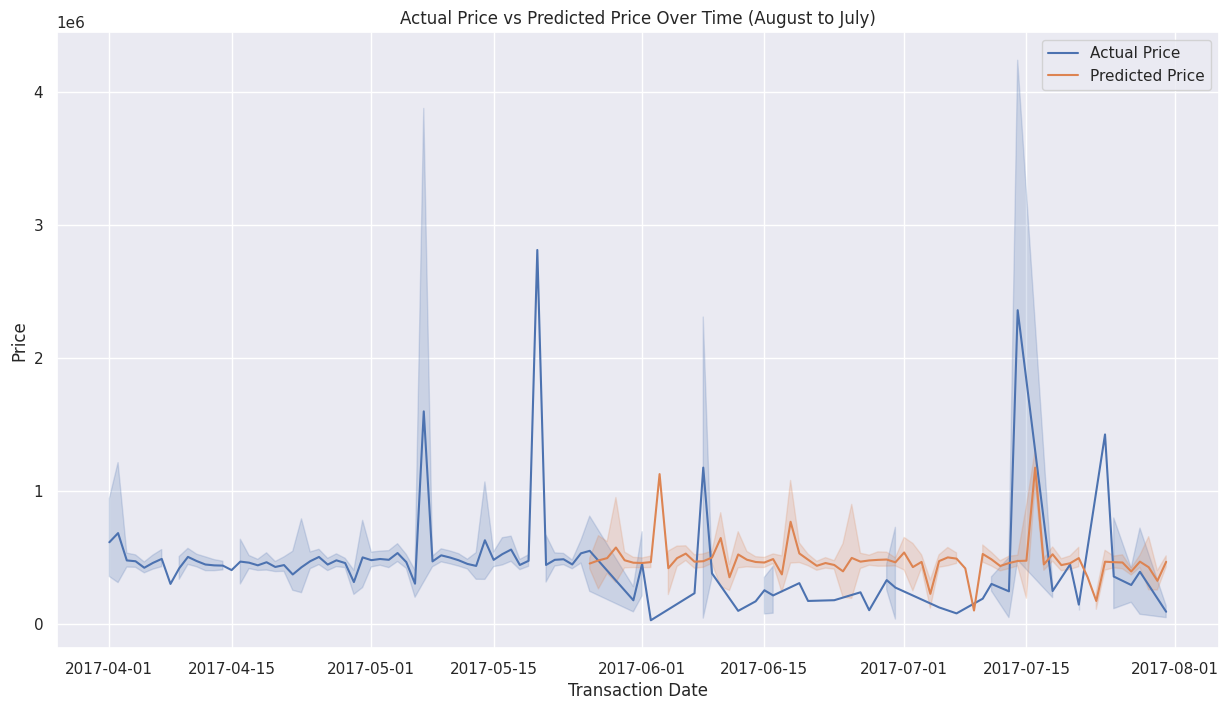

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values along with the corresponding transaction dates
lm_ts = pd.DataFrame()
lm_ts = aug_jul_2017
lm_ts['pred_lm'] = y_val_pred

timeseries_data = pd.DataFrame({
    'Transaction Date': lm_ts['transactiondate'],
    'Actual Price': lm_ts['taxvaluedollarcnt'],
    'Predicted Price': lm_ts['pred_lm']
})

# Melt the DataFrame for Seaborn visualization
melted_data = timeseries_data.melt('Transaction Date', var_name='Price Type', value_name='Price')

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a Seaborn lineplot
sns.lineplot(x=timeseries_data['Transaction Date'], y=timeseries_data['Predicted Price'], hue='Price Type', data= melted_data)

# Set plot labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price Over Time (August to July)')
plt.legend()

# Show the plot
plt.show()


In [38]:
print('------------Lasso Regression-----------------')
# Import library for Lasso Regression
from sklearn.linear_model import Lasso

# Create a Lasso regressor
lasso = Lasso()

# Train the model using the training sets
lasso.fit(X_train, y_train)

# Model prediction on the training set
y_train_pred = lasso.predict(X_train)
print("========================================================================")
# Model Evaluation on the training set
print('------------Train Set-----------------')
print('R^2:', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_train_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
rmse_train_lasso = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_train_lasso =  (rmse_train_lasso/np.mean(y_train))
print('RMSE: {:.2f}'.format(rmse_train_lasso))
print("========================================================================")

print("========================================================================")
# # Predicting Test data with the model
# y_test_pred = lasso.predict(X_test)

# # Model Evaluation on the test set
# print('------------Test Set-----------------')
# acc_lasso = metrics.r2_score(y_test, y_test_pred)
# mae_lasso = metrics.mean_absolute_error(y_test, y_test_pred)
# rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
# rmse_lasso2 =  (rmse_lasso / (sum(y_test_pred) / len(y_test_pred)))
# print('R^2:', acc_lasso)
# print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
# print('MAE:', mae_lasso)
# print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
# print('RMSE (Lasso Regression): {:.2f}'.format(rmse_lasso2))
# # Model prediction on the validation set
y_val_pred_lasso = lasso.predict(X_val)

# Model Evaluation on the validation set
print("========================================================================")
print("========================================================================")
print('------------Validation Set-----------------')
print('R^2:', metrics.r2_score(y_val, y_val_pred_lasso))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_val, y_val_pred_lasso)) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_val, y_val_pred_lasso))
print('MSE:', metrics.mean_squared_error(y_val, y_val_pred_lasso))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred_lasso))
rmse_val = (rmse_val / (sum(y_val_pred_lasso) / len(y_val_pred_lasso)))
print('RMSE: {:.2f}'.format(rmse_val))
print("========================================================================")



------------Lasso Regression-----------------
------------Train Set-----------------
R^2: 0.9329729097494481
Adjusted R^2: 0.9329495239331816
MAE: 66539.37667974678
MSE: 21009339647.86336
RMSE: 0.31
------------Validation Set-----------------
R^2: 0.9666352389860839
Adjusted R^2: 0.9666235895695642
MAE: 59309.567669267846
MSE: 12945406488.926117
RMSE: 0.24


<ipython-input-39-9128a55f3a26>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lm_ts['pred_lasso'] = y_val_pred_lasso


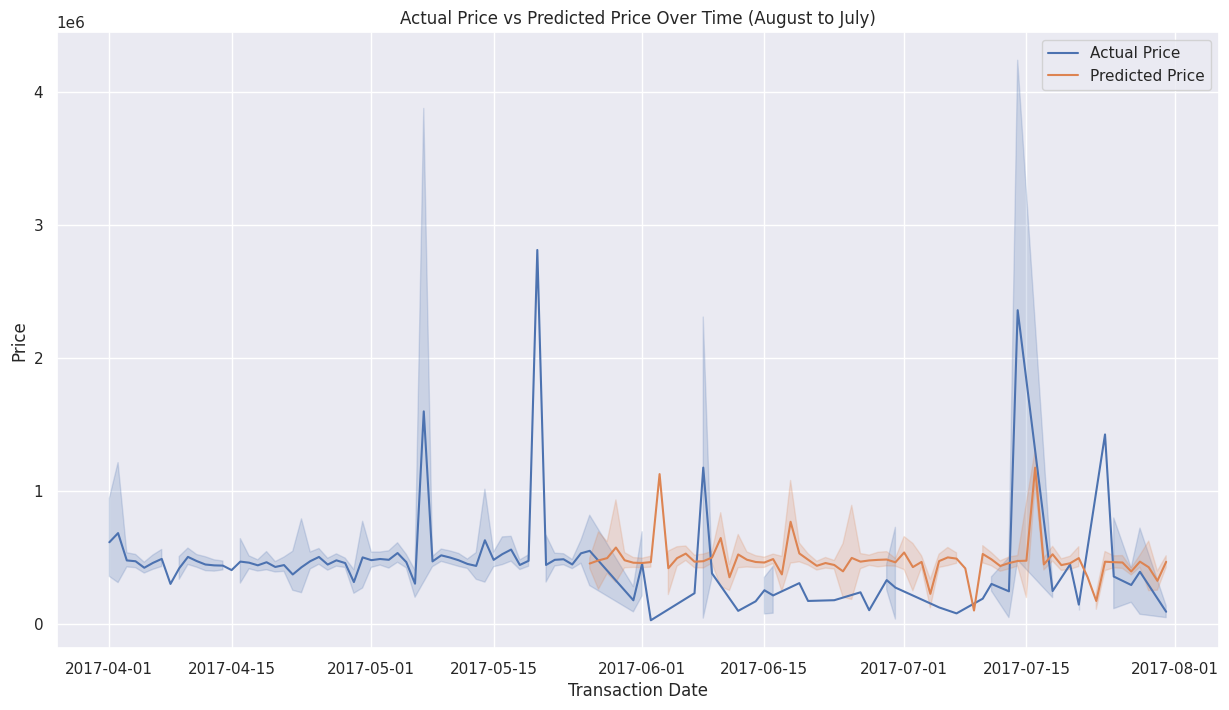

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values along with the corresponding transaction dates
lm_ts = pd.DataFrame()
lm_ts = aug_jul_2017
lm_ts['pred_lasso'] = y_val_pred_lasso

timeseries_data = pd.DataFrame({
    'Transaction Date': lm_ts['transactiondate'],
    'Actual Price': lm_ts['taxvaluedollarcnt'],
    'Predicted Price': lm_ts['pred_lasso']
})

# Melt the DataFrame for Seaborn visualization
# melted_data = timeseries_data.melt('Transaction Date', var_name='Price Type', value_name='Price')

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a Seaborn lineplot
sns.lineplot(x=timeseries_data['Transaction Date'], y=timeseries_data['Predicted Price'], hue='Price Type', data=melted_data)

# Set plot labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price Over Time (August to July)')
plt.legend()

# Show the plot
plt.show()


In [40]:
print('------------K-Nearest Neighbors (KNN) Regression-----------------')
# Import library for KNN Regression
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regressor with a specified number of neighbors (adjust n_neighbors as needed)
knn = KNeighborsRegressor(n_neighbors=8)  # You can adjust the number of neighbors as needed

# Train the model using the training sets
knn.fit(X_train, y_train)

# Model prediction on the training set
y_train_pred = knn.predict(X_train)
print("========================================================================")
# Model Evaluation on the training set
print('------------Train Set-----------------')
print('R^2:', metrics.r2_score(y_train, y_train_pred))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
rmse_train_knn = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_train_knn =  (rmse_train_knn/np.mean(y_train))
print('RMSE: {:.2f}'.format(rmse_train_knn))
print("========================================================================")

y_val_pred_knn = knn.predict(X_val)

# Model Evaluation on the validation set
print("========================================================================")
print("========================================================================")
print('------------Validation Set-----------------')
print('R^2:', metrics.r2_score(y_val, y_val_pred_knn))
print('MAE:', metrics.mean_absolute_error(y_val, y_val_pred_knn))
print('MSE:', metrics.mean_squared_error(y_val, y_val_pred_knn))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred_knn))
rmse_val = (rmse_val / (sum(y_val_pred_knn) / len(y_val_pred_knn)))
print('RMSE: {:.2f}'.format(rmse_val))
print("========================================================================")


------------K-Nearest Neighbors (KNN) Regression-----------------
------------Train Set-----------------
R^2: 0.893432359209648
MAE: 61315.94327184176
MSE: 33403147182.233078
RMSE: 0.39
------------Validation Set-----------------
R^2: 0.8783145171368244
MAE: 68621.71471824592
MSE: 47213526834.7355
RMSE: 0.47


<ipython-input-41-6bdc9d88590d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lm_ts['pred_knn'] = y_val_pred_knn


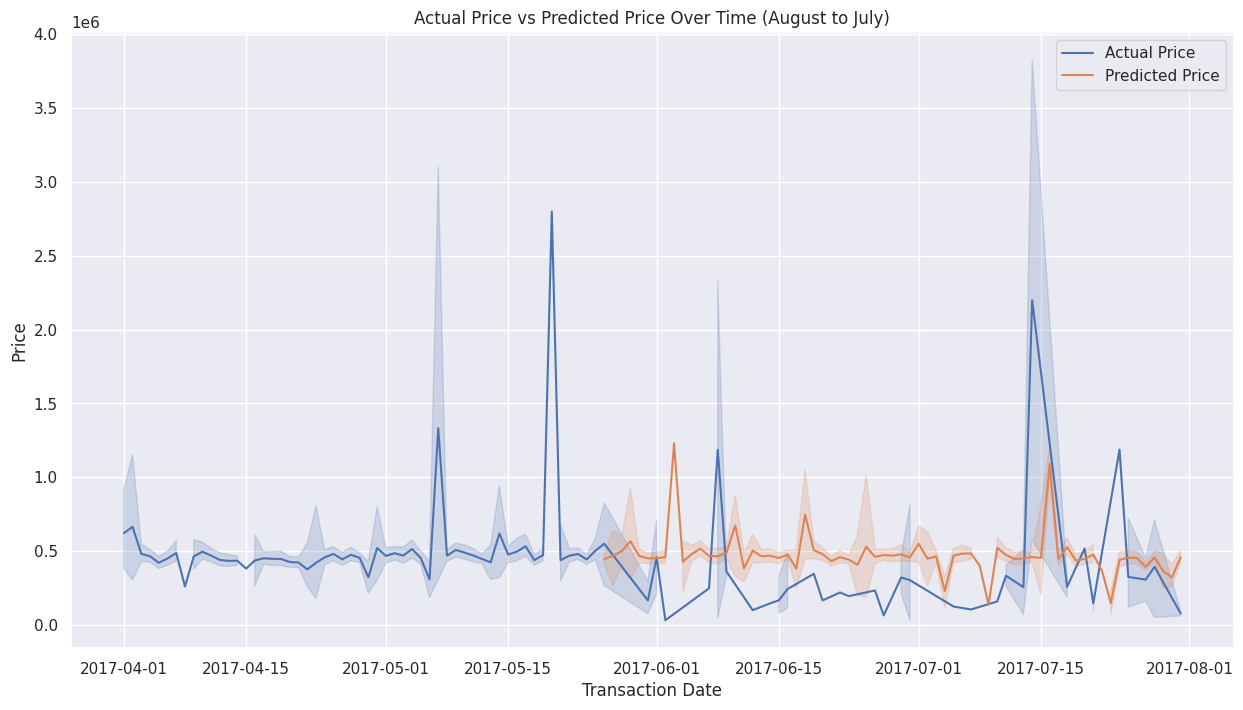

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values along with the corresponding transaction dates
lm_ts = pd.DataFrame()
lm_ts = aug_jul_2017
lm_ts['pred_knn'] = y_val_pred_knn

timeseries_data = pd.DataFrame({
    'Transaction Date': lm_ts['transactiondate'],
    'Actual Price': lm_ts['taxvaluedollarcnt'],
    'Predicted Price': lm_ts['pred_knn']
})

# Melt the DataFrame for Seaborn visualization
# melted_data = timeseries_data.melt('Transaction Date', var_name='Price Type', value_name='Price')

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a Seaborn lineplot
sns.lineplot(x=timeseries_data['Transaction Date'], y=timeseries_data['Predicted Price'], hue='Price Type', data=melted_data)

# Set plot labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price Over Time (August to July)')
plt.legend()

# Show the plot
plt.show()


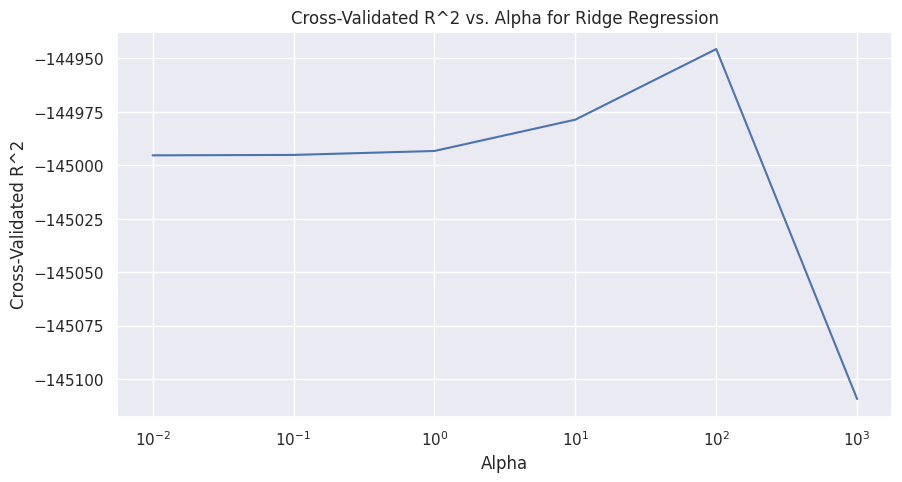

Optimal Alpha: 100


In [42]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define a range of alpha values to test
alphas = [0.01, 0.1, 1.0, 10.0, 100,1000]  # You can adjust the range of alphas as needed

# Lists to store alpha values and their corresponding cross-validated R^2 scores
alpha_values = []
mean_cv_r2 = []

for alpha in alphas:
    # Create a Ridge regressor with the current alpha
    ridge = Ridge(alpha=alpha)

    # Get cross-validated R^2 scores
    cv_r2 = cross_val_score(ridge, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)  # You can adjust the number of cross-validation folds

    alpha_values.append(alpha)
    mean_cv_r2.append(np.mean(cv_r2))

# Plot the cross-validated R^2 values for different alpha values
plt.figure(figsize=(10, 5))
plt.plot(alpha_values, mean_cv_r2)
plt.title('Cross-Validated R^2 vs. Alpha for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Cross-Validated R^2')
plt.xscale('log')
plt.grid(True)
plt.show()

# Find the optimal alpha with the highest cross-validated R^2
optimal_alpha = alpha_values[np.argmax(mean_cv_r2)]
print('Optimal Alpha:', optimal_alpha)


In [43]:
print('------------Ridge Regression-----------------')
# Import library for Ridge Regression
from sklearn.linear_model import Ridge

# Create a Ridge regressor with a specified alpha value (adjust alpha as needed)
ridge = Ridge(alpha=100)  # You can adjust the alpha value as needed for regularization

# Train the model using the training sets
ridge.fit(X_train, y_train)

# Model prediction on the training set
y_train_pred = ridge.predict(X_train)
print("========================================================================")
# Model Evaluation on the training set
print('------------Train Set-----------------')
print('R^2:', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_train_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
rmse_train_rr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_train_rr =  (rmse_train_rr/np.mean(y_train))
print('RMSE: {:.2f}'.format(rmse_train_rr))
print("========================================================================")

y_val_pred_ridge = ridge.predict(X_val)

# Model Evaluation on the validation set
print("========================================================================")
print("========================================================================")
print('------------Validation Set-----------------')
print('R^2:', metrics.r2_score(y_val, y_val_pred_ridge))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_val, y_val_pred_ridge)) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_val, y_val_pred_ridge))
print('MSE:', metrics.mean_squared_error(y_val, y_val_pred_ridge))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred_ridge))
rmse_val = (rmse_val / (sum(y_val_pred_ridge) / len(y_val_pred_ridge)))
print('RMSE: {:.2f}'.format(rmse_val))
print("========================================================================")


------------Ridge Regression-----------------
------------Train Set-----------------
R^2: 0.932963993380596
Adjusted R^2: 0.9329406044533999
MAE: 66527.9949940765
MSE: 21012134443.533924
RMSE: 0.31
------------Validation Set-----------------
R^2: 0.9666373265424204
Adjusted R^2: 0.9666256778547778
MAE: 59298.42984401371
MSE: 12944596524.624779
RMSE: 0.24


<ipython-input-44-ea77e9f56524>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ridge_ts['pred_ridge'] = y_val_pred_ridge


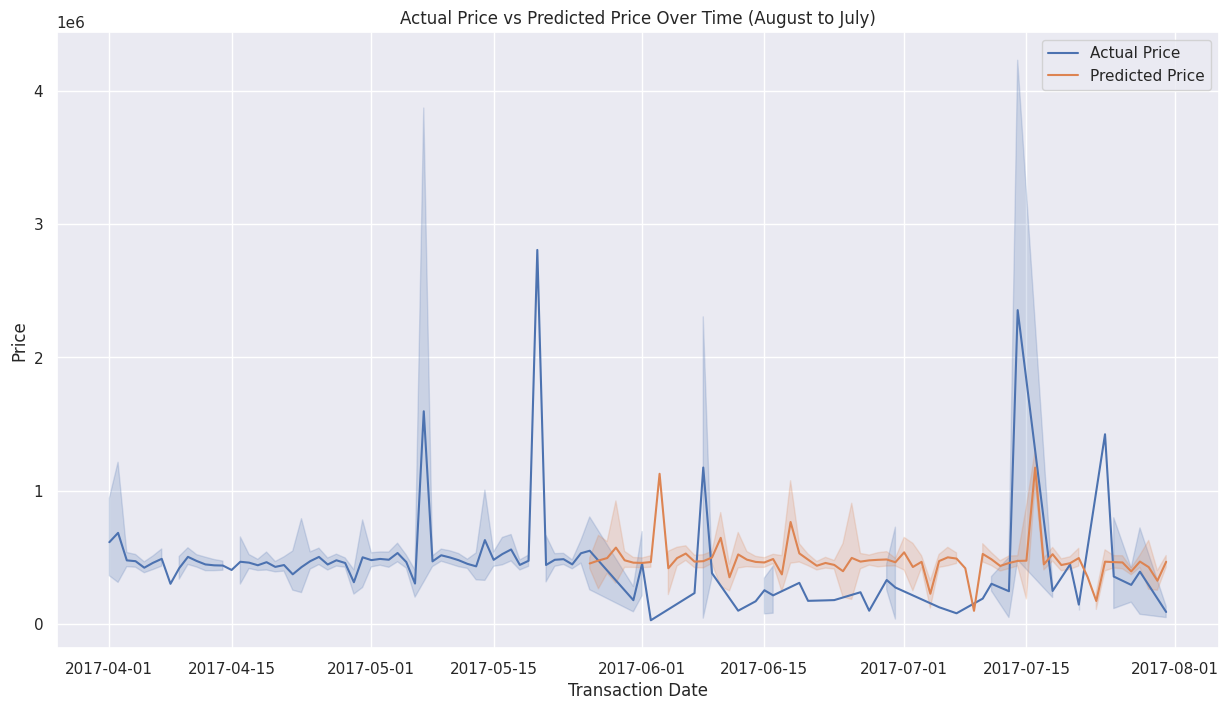

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values along with the corresponding transaction dates
ridge_ts = pd.DataFrame()
ridge_ts = aug_jul_2017
ridge_ts['pred_ridge'] = y_val_pred_ridge

timeseries_data = pd.DataFrame({
    'Transaction Date': ridge_ts['transactiondate'],
    'Actual Price': ridge_ts['taxvaluedollarcnt'],
    'Predicted Price': ridge_ts['pred_ridge']
})

# Melt the DataFrame for Seaborn visualization
# melted_data = timeseries_data.melt('Transaction Date', var_name='Price Type', value_name='Price')

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a Seaborn lineplot
sns.lineplot(x=timeseries_data['Transaction Date'], y=timeseries_data['Predicted Price'], hue='Price Type', data=melted_data)

# Set plot labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price Over Time (August to July)')
plt.legend()

# Show the plot
plt.show()


In [45]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# palette = sns.color_palette('mako', as_cmap=True)

# # Visualizing the differences between actual prices and predicted values
# plt.figure(figsize=(10, 6))  # Adjusted figure size to match the original
# plt.scatter(y_test, y_test_pred, alpha=0.7, cmap=palette, edgecolors='k', s=50)  # Added edgecolors and marker size
# plt.xlabel("Actual Prices", fontsize=12)
# plt.ylabel("Predicted Prices", fontsize=12)
# plt.title("Prices vs Predicted Prices", fontsize=14)
# plt.colorbar(label="Predicted Prices")
# plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], linestyle='--', color='r', linewidth=2)
# plt.grid(True)
# plt.show()


# XG BOOST

In [46]:
print('------------XGBoost Regressor-----------------')
# Import XGBoost Regressor
from xgboost import XGBRegressor

# Create a XGBoost Regressor
xgb_regressor = XGBRegressor()

# Train the model using the training sets
xgb_regressor.fit(X_train, y_train)

# Model prediction on train data
y_train_pred_xgb = xgb_regressor.predict(X_train)
print('------------Train Set-----------------')
# Model Evaluation
print('R^2:', metrics.r2_score(y_train, y_train_pred_xgb))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_train_pred_xgb)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred_xgb))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_xgb)))
rmse_xgb_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_xgb))
rmse_xgb_train =  (rmse_xgb_train / np.mean(y_train))
print('RMSE (XG Boost_train): {:.2f}'.format(rmse_xgb_train))

# # Predicting Test data with the model
# y_test_pred_xgb = xgb_regressor.predict(X_test)
# print('------------Test Set-----------------')
# # Model Evaluation
# acc_xgb = metrics.r2_score(y_test, y_test_pred_xgb)
# mae_xgb = metrics.mean_absolute_error(y_test, y_test_pred_xgb)
# rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgb))
# rmse_xgb2 =  (rmse_xgb / np.mean(y_test))
# print('R^2:', acc_xgb)
# print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_test_pred_xgb)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
# print('MAE:', mae_xgb)
# print('MSE:', metrics.mean_squared_error(y_test, y_test_pred_xgb))
# print('RMSE:', rmse_xgb)
# print('RMSE (XG Boost): {:.2f}'.format(rmse_xgb2))

# Model prediction on the validation set
y_val_pred_xgb = xgb_regressor.predict(X_val)
print("------------Validation Set-----------------")
# Model Evaluation
acc_xgb_val = metrics.r2_score(y_val, y_val_pred_xgb)
mae_xgb_val = metrics.mean_absolute_error(y_val, y_val_pred_xgb)
rmse_xgb_val = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred_xgb))
rmse_xgb_val2 =  (rmse_xgb_val / np.mean(y_val))
print('R^2:', acc_xgb_val)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_val, y_val_pred_xgb)) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1))
print('MAE:', mae_xgb_val)
print('MSE:', metrics.mean_squared_error(y_val, y_val_pred_xgb))
print('RMSE:', rmse_xgb_val)
print('RMSE (XG Boost Validation): {:.2f}'.format(rmse_xgb_val2))



------------XGBoost Regressor-----------------
------------Train Set-----------------
R^2: 0.9837393496165592
Adjusted R^2: 0.9837336762599982
MAE: 39954.936618816624
MSE: 5096827648.699172
RMSE: 71392.06992866345
RMSE (XG Boost_train): 0.15
------------Validation Set-----------------
R^2: 0.8200577172175549
Adjusted R^2: 0.819994889775129
MAE: 53109.572554974955
MSE: 69816954306.74501
RMSE: 264228.98082296917
RMSE (XG Boost Validation): 0.53


<ipython-input-47-32830ecc77b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xg_ts['pred_xgb'] = y_val_pred_xgb


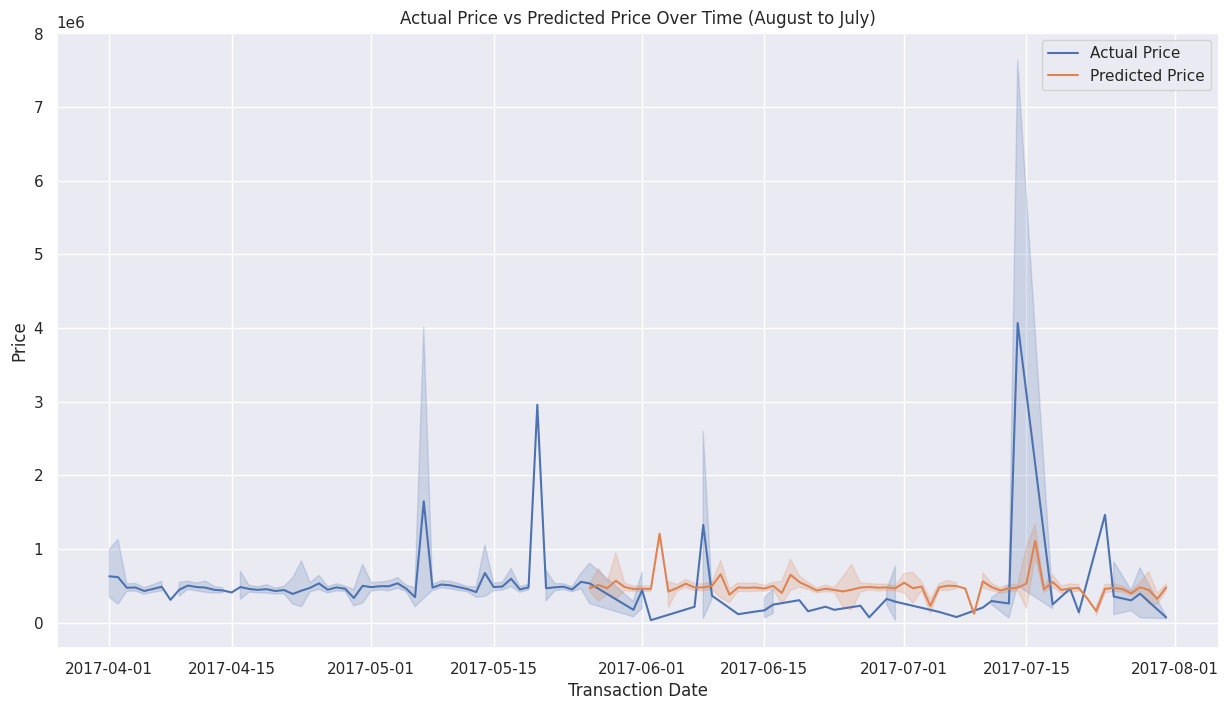

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values along with the corresponding transaction dates
xg_ts = pd.DataFrame()
xg_ts = aug_jul_2017
xg_ts['pred_xgb'] = y_val_pred_xgb

timeseries_data = pd.DataFrame({
    'Transaction Date': xg_ts['transactiondate'],
    'Actual Price': xg_ts['taxvaluedollarcnt'],
    'Predicted Price': xg_ts['pred_xgb']
})

# Melt the DataFrame for Seaborn visualization
# melted_data = timeseries_data.melt('Transaction Date', var_name='Price Type', value_name='Price')

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a Seaborn lineplot
sns.lineplot(x=timeseries_data['Transaction Date'], y=timeseries_data['Predicted Price'], hue='Price Type', data=melted_data)

# Set plot labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price Over Time (August to July)')
plt.legend()

# Show the plot
plt.show()


In [48]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# palette = sns.color_palette('coolwarm', as_cmap=True)

# # Visualizing the differences between actual prices and predicted values
# plt.figure(figsize=(10, 6))  # Adjusted figure size to match the original
# plt.scatter(y_test, y_test_pred, alpha=0.7, cmap=palette, edgecolors='k', s=50)  # Added edgecolors and marker size
# plt.xlabel("Actual Prices", fontsize=12)




# plt.ylabel("Predicted Prices", fontsize=12)
# plt.title("Prices vs Predicted Prices", fontsize=14)
# plt.colorbar(label="Predicted Prices")
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
# plt.grid(True)
# plt.show()


# XG BOOST HYPERPARAMETER TUNING

In [61]:
print('------------XGBoost Regressor-----------------')

# Import XGBoost Regressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to iterate over
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.001, 0.0001],
    'n_estimators': [100, 500, 1000],
    'missing': [np.nan],
    'objective': ['reg:squarederror'],
    'reg_lambda': [0, 1, 10],
}


# create XGBoost regressor
model = XGBRegressor(
    tree_method='gpu_hist',
    verbosity=0,
    # reg_lambda=1
)

# perform grid search using 5-fold cross-validation
grid_search = GridSearchCV( estimator=model, param_grid=param_grid,scoring='neg_mean_squared_error',cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# fit the model to the training data

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_model.predict(X_train)
print('------------Train Set-----------------')
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
rmse_train_xg_hyp = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_train_xg_hyp =  (rmse_train_xg_hyp/np.mean(y_train))
print('RMSE: {:.2f}'.format(rmse_train_xg_hyp))
print("========================================================================")

# print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
y_val_pred_xgb_tuned = best_model.predict(X_val)
print("------------Validation Set-----------------")
# Model Evaluation
acc_xgb_val = metrics.r2_score(y_val, y_val_pred_xgb_tuned)
mae_xgb_val = metrics.mean_absolute_error(y_val, y_val_pred_xgb_tuned)
rmse_xgb_val = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred_xgb_tuned))
rmse_xgb_val2 =  (rmse_xgb_val / np.mean(y_val))
print('R^2:', acc_xgb_val)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_val, y_val_pred_xgb_tuned)) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1))
print('MAE:', mae_xgb_val)
print('MSE:', metrics.mean_squared_error(y_val, y_val_pred_xgb_tuned))
print('RMSE:', rmse_xgb_val2)
print('RMSE (XG Boost Validation): {:.2f}'.format(rmse_xgb_val2))

------------XGBoost Regressor-----------------
------------Train Set-----------------
R^2: 0.8646129074744804
Adjusted R^2: 0.8645656707876599
MAE: 66698.78622854438
MSE: 42436474568.30976
RMSE: 0.31
------------Validation Set-----------------
R^2: 0.868803247712348
Adjusted R^2: 0.8687574399329124
MAE: 63982.13208088054
MSE: 50903864939.48584
RMSE: 225618.84881251797
RMSE (XG Boost Validation): 0.45


<ipython-input-62-f99d55a3b589>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_ts['pred_xg_tuned'] = y_val_pred_xgb_tuned


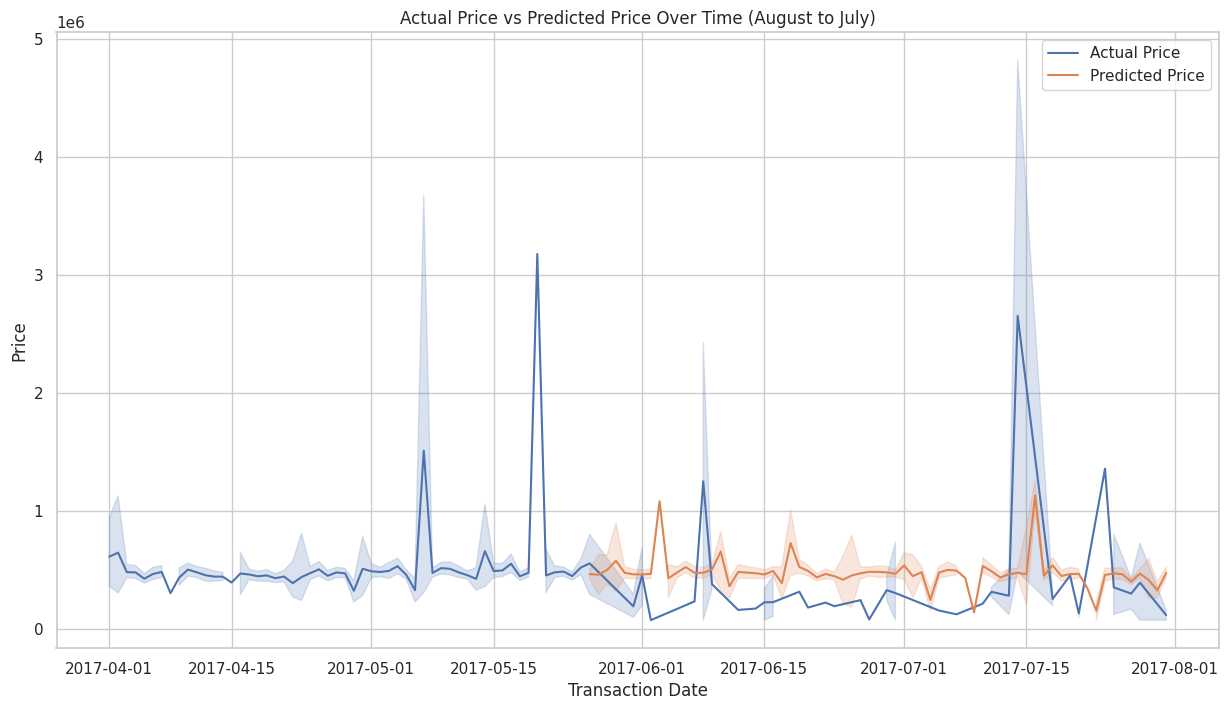

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values along with the corresponding transaction dates
rabdom_ts = pd.DataFrame()
random_ts = aug_jul_2017
random_ts['pred_xg_tuned'] = y_val_pred_xgb_tuned

timeseries_data = pd.DataFrame({
    'Transaction Date': ridge_ts['transactiondate'],
    'Actual Price': ridge_ts['taxvaluedollarcnt'],
    'Predicted Price': ridge_ts['pred_xg_tuned']
})

# Melt the DataFrame for Seaborn visualization
# melted_data = timeseries_data.melt('Transaction Date', var_name='Price Type', value_name='Price')

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a Seaborn lineplot

sns.lineplot(x=timeseries_data['Transaction Date'], y=timeseries_data['Predicted Price'], hue='Price Type', data=melted_data)

# Set plot labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price Over Time (August to July)')
plt.legend()

# Show the plot
plt.show()


In [63]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# palette = sns.color_palette('coolwarm', as_cmap=True)

# # Visualizing the differences between actual prices and predicted values
# plt.figure(figsize=(10, 6))  # Adjusted figure size to match the original
# plt.scatter(y_test, y_pred_xgt, alpha=0.7, cmap=palette, edgecolors='k', s=50)  # Added edgecolors and marker size
# plt.xlabel("Actual Prices", fontsize=12)
# plt.ylabel("Predicted Prices", fontsize=12)
# plt.title("Prices vs Predicted Prices", fontsize=14)
# plt.colorbar(label="Predicted Prices")
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
# plt.grid(True)
# plt.show()


In [64]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# palette = sns.color_palette('coolwarm', as_cmap=True)

# # Visualizing the differences between actual prices and predicted values
# plt.figure(figsize=(10, 6))  # Adjusted figure size to match the original
# plt.scatter(y_test, y_test_pred, alpha=0.7, cmap=palette, edgecolors='k', s=50)  # Added edgecolors and marker size
# plt.xlabel("Actual Prices", fontsize=12)
# plt.ylabel("Predicted Prices", fontsize=12)
# plt.title("Prices vs Predicted Prices", fontsize=14)
# plt.colorbar(label="Predicted Prices")
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
# plt.grid(True)
# plt.show()


# RANDOM FORREST

In [65]:
print('------------Random Forest Regressor-----------------')

# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg_rf = RandomForestRegressor(random_state=4)

# Train the model using the training sets
reg_rf.fit(X_train, y_train)

# Model prediction on train data
y_pred_rf_train = reg_rf.predict(X_train)

print('------------Train Set-----------------')
# Model Evaluation for training set
print('R^2:', metrics.r2_score(y_train, y_pred_rf_train))
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_pred_rf_train)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_rf_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_rf_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf_train)))
rmse_train_rf = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_train_rf =  (rmse_train_rf/np.mean(y_train))
print('RMSE: {:.2f}'.format(rmse_train_rf))

# Predicting Test data with the model
# y_pred_rf_test = reg_rf.predict(X_test)
# print('------------Test Set-----------------')
# # Model Evaluation for test set
# acc_rf = metrics.r2_score(y_test, y_pred_rf_test)
# mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf_test)
# rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_test))
# rmse_rf2 =  (rmse_rf / (sum(y_pred_rf_test) / len(y_pred_rf_test)))
# print('R^2:', acc_rf)
# print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_pred_rf_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
# print('MAE:', mae_rf)
# print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf_test))
# print('RMSE:', rmse_rf)
# print('RMSE:', rmse_rf2)

# Model prediction on the validation set
y_pred_rf_val = reg_rf.predict(X_val)
print('------------Validation Set-----------------')
# Model Evaluation for validation set
acc_rf_val = metrics.r2_score(y_val, y_pred_rf_val)
mae_rf_val = metrics.mean_absolute_error(y_val, y_pred_rf_val)
rmse_rf_val = np.sqrt(metrics.mean_squared_error(y_val, y_pred_rf_val))
rmse_rf_val2 =  (rmse_rf_val / (sum(y_pred_rf_val) / len(y_pred_rf_val)))
print('R^2:', acc_rf_val)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_val, y_pred_rf_val)) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1))
print('MAE:', mae_rf_val)
print('MSE:', metrics.mean_squared_error(y_val, y_pred_rf_val))
print('RMSE:', rmse_rf_val)
print('RMSE:', rmse_rf_val2)


------------Random Forest Regressor-----------------
------------Train Set-----------------
R^2: 0.9902109764550691
Adjusted R^2: 0.9902075610553375
MAE: 18257.017689893124
MSE: 3068325354.8320594
RMSE: 55392.46658916769
RMSE: 0.31
------------Validation Set-----------------
R^2: 0.9689701322668891
Adjusted R^2: 0.968959298086071
MAE: 44200.0345611857
MSE: 12039476348.570028
RMSE: 109724.54761159887
RMSE: 0.2309848182825771


<ipython-input-66-82e03abf5c85>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_ts['pred_rf'] = y_pred_rf_val


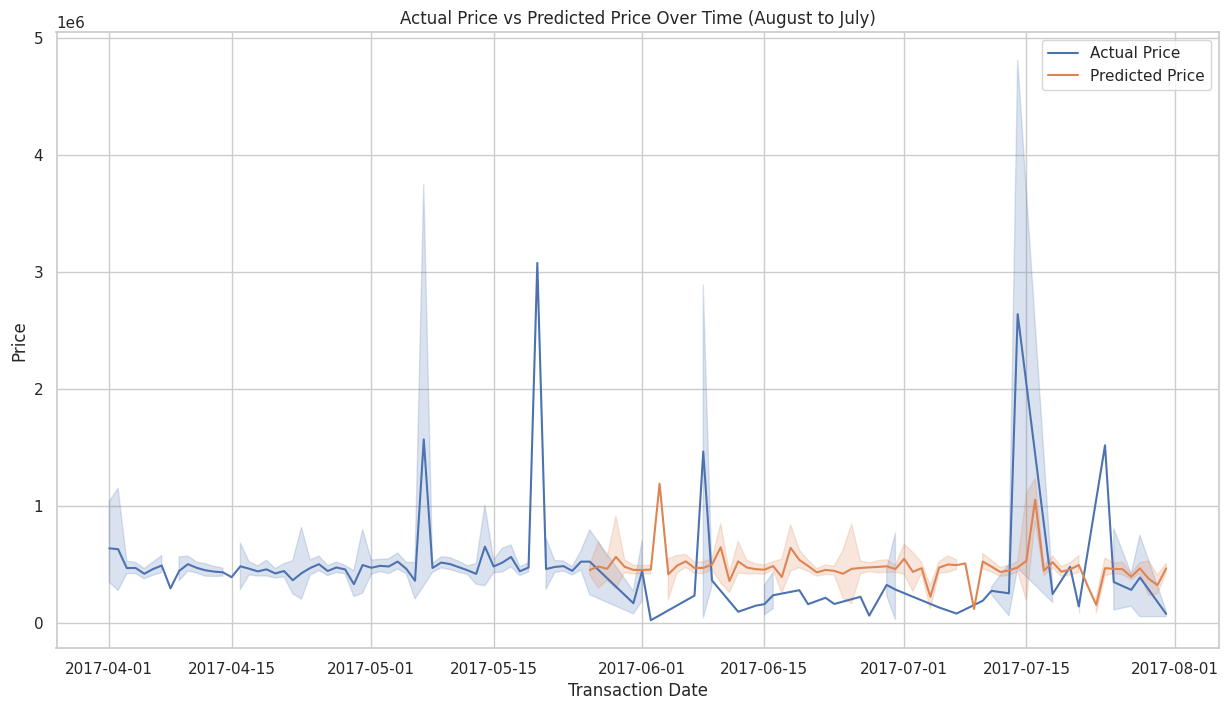

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values along with the corresponding transaction dates
rabdom_ts = pd.DataFrame()
random_ts = aug_jul_2017
random_ts['pred_rf'] = y_pred_rf_val

timeseries_data = pd.DataFrame({
    'Transaction Date': ridge_ts['transactiondate'],
    'Actual Price': ridge_ts['taxvaluedollarcnt'],
    'Predicted Price': ridge_ts['pred_rf']
})

# Melt the DataFrame for Seaborn visualization
# melted_data = timeseries_data.melt('Transaction Date', var_name='Price Type', value_name='Price')

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a Seaborn lineplot

sns.lineplot(x=timeseries_data['Transaction Date'], y=timeseries_data['Predicted Price'], hue='Price Type', data=melted_data)

# Set plot labels and title
plt.xlabel('Transaction Date')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price Over Time (August to July)')
plt.legend()

# Show the plot
plt.show()


# RANDOM FOREST HYPERPARAMTER TUNING

In [55]:
# # Import Random Forest Regressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn import metrics
# import numpy as np

# print('------------Random Forest Regressor-----------------')

# # Define the hyperparameters to iterate over
# param_grid = {
#     'n_estimators': [50, 80, 100,500],
#     'max_depth': [3, 5, 7,12],
#     'min_samples_leaf': [1, 2, 4,6,8,12],
#     'bootstrap': [True, False]
# }

# # Create a Random Forest Regressor
# reg_rf = RandomForestRegressor(random_state=4)

# # Create a grid search object
# grid_search = GridSearchCV(estimator=reg_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# grid_search.fit(X_train, y_train)

# # # Train the model using the grid search object
# # grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and model
# best_params = grid_search.best_params_
# best_rf_model = grid_search.best_estimator_

# # Model prediction on train data using the best model
# y_pred_rf_train = best_rf_model.predict(X_train)
# print('------------Train Set-----------------')
# # Model Evaluation for training set
# print('R^2:', metrics.r2_score(y_train, y_pred_rf_train))
# print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_train, y_pred_rf_train)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))
# print('MAE:', metrics.mean_absolute_error(y_train, y_pred_rf_train))
# print('MSE:', metrics.mean_squared_error(y_train, y_pred_rf_train))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf_train)))

# # Predicting Test data with the best model
# # y_pred_rf_test_tuned = best_rf_model.predict(X_test)
# # print('------------Test Set-----------------')
# # # Model Evaluation for  l.;/'
# # acc_rf = metrics.r2_score(y_test, y_pred_rf_test)
# # mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf_test)
# # rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_test))
# # rmse_rf2 = (rmse_rf / (sum(y_pred_rf_test) / len(y_pred_rf_test)))
# # print('R^2:', acc_rf)
# # print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_pred_rf_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
# # print('MAE:', mae_rf)
# # print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf_test))
# # print('RMSE:', rmse_rf)
# # print('RMSE (Normalized):', rmse_rf2)

# # Print the best hyperparameters and the corresponding evaluation metrics


In [56]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# palette = sns.color_palette('coolwarm', as_cmap=True)

# # Visualizing the differences between actual prices and predicted values
# plt.figure(figsize=(10, 6))  # Adjusted figure size to match the original
# plt.scatter(y_test, y_pred_rf_test_tuned, alpha=0.7, cmap=palette, edgecolors='k', s=50)  # Added edgecolors and marker size
# plt.xlabel("Actual Prices", fontsize=12)
# plt.ylabel("Predicted Prices", fontsize=12)
# plt.title("Prices vs Predicted Prices", fontsize=14)
# plt.colorbar(label="Predicted Prices")
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
# plt.grid(True)
# plt.show()

# FINAL RESULTS

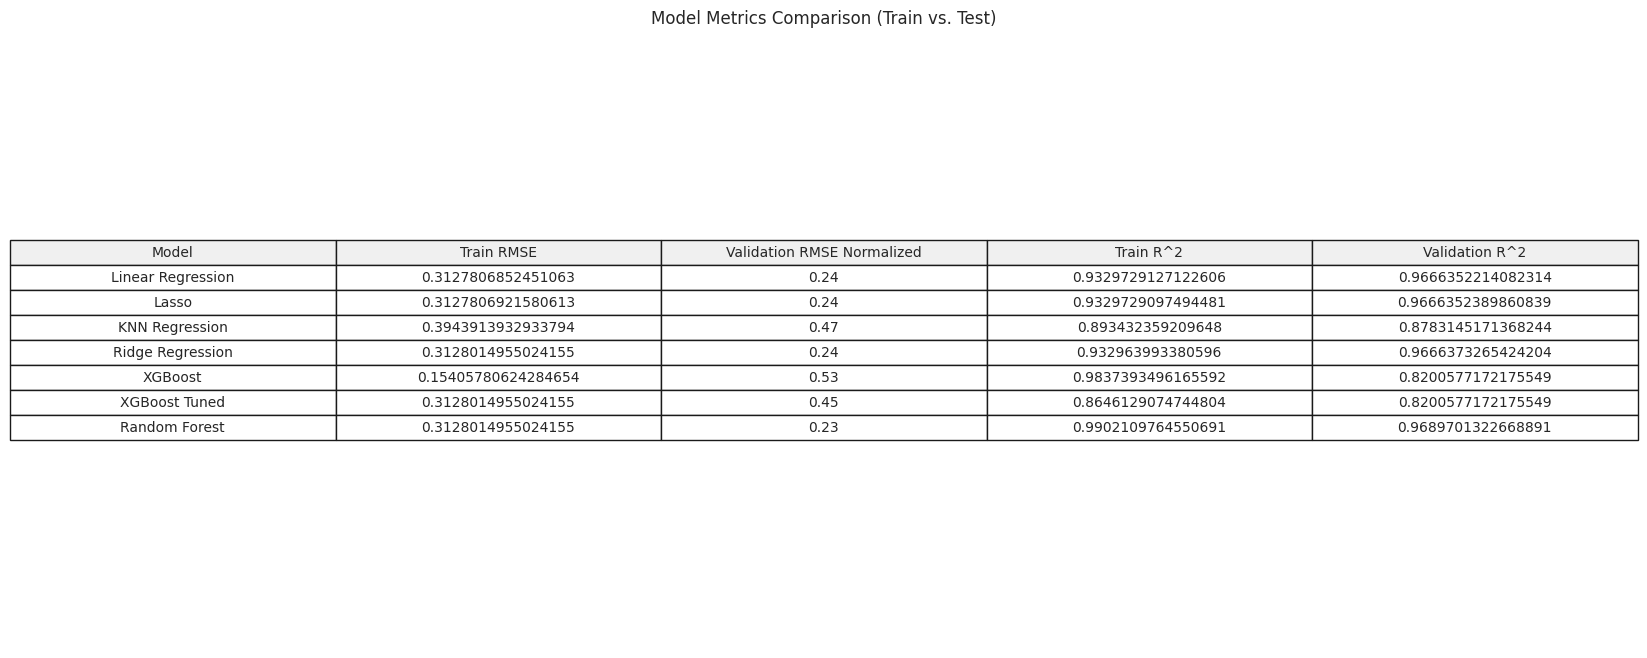

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Define the data
models = ['Linear Regression', 'Lasso', 'KNN Regression', 'Ridge Regression', 'XGBoost', 'XGBoost Tuned', 'Random Forest']
train_r2 = [0.9329729127122606, 0.9329729097494481, 0.893432359209648, 0.932963993380596, 0.9837393496165592, 0.8646129074744804, 0.9902109764550691]
test_r2 = [0.9666352214082314, 0.9666352389860839, 0.8783145171368244, 0.9666373265424204, 0.8200577172175549, 0.8200577172175549, 0.9689701322668891]

train_adj_r2 = [0.9329495268970278, 0.9329495239331816, None, 0.9329406044533999, 0.9837336762599982, 0.8645656707876599, 0.9902075610553375]
test_adj_r2 = [0.9666235719855742, 0.9666235895695642, None, 0.9666256778547778, 0.819994889775129, 0.819994889775129, 0.968959298086071]

train_mae = [66539.60951373033, 66539.37667974678, 61315.94327184176, 66527.9949940765, 39954.936618816624, 66698.78622854438, 18257.017689893124]
test_mae = [59309.49090648734, 59309.567669267846, 68621.71471824592, 59298.42984401371, 53109.572554974955, 53109.572554974955, 44200.0345611857]

train_mse = [21009338719.183163, 21009339647.86336, 33403147182.233078, 21012134443.533924, 5096827648.699172, 42436474568.30976, 3068325354.8320594]
test_mse = [12945413309.06927, 12945406488.926117, 47213526834.7355, 12944596524.624779, 69816954306.74501, 69816954306.74501, 12039476348.570028]
train_rmse = [rmse_train_linreg, rmse_train_lasso, rmse_train_knn, rmse_train_rr, rmse_xgb_train, rmse_train_xg_hyp,rmse_train_rf]

test_rmse_normalized = [0.24, 0.24, 0.47, 0.24, 0.53, 0.45, 0.23]

# Create a dictionary with the data
data = {

    'Model': models,
    'Train RMSE': train_rmse,
    'Validation RMSE Normalized': test_rmse_normalized,
    'Train R^2': train_r2,
    'Validation R^2': test_r2
}

# Convert the dictionary to a DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Set up Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Create the table using tabulate
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=["#f0f0f0"] * len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

# Hide axis
ax.axis('off')

# Show the table
plt.title('Model Metrics Comparison (Train vs. Test)')
plt.show()
